#📌 Extracción

In [2]:
import pandas as pd


In [3]:
url =" https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df=pd.read_json(url)

#🔧 Transformación

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


**Diccionario de datos**
*   customerID: número de identificación único de cada cliente
*   Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
*   SeniorCitizen: información sobre si un cliente tiene 65 años o más
*   Partner: si el cliente tiene pareja o no
*   Dependents: si el cliente tiene dependientes o no
*   tenure: meses de contrato del cliente
*   PhoneService: suscripción de servicio telefónico
*   MultipleLines: suscripción a más de una línea de teléfono
*   InternetService: suscripción a un proveedor de internet
*   OnlineSecurity: suscripción adicional de seguridad online
*   OnlineBackup: suscripción adicional de backup online
*   DeviceProtection: suscripción adicional de protección en el dispositivo
*   TechSupport: suscripción adicional de soporte técnico, menos tiempo de espera
*   StreamingTV: suscripción de TV por cable
*   StreamingMovies: suscripción de streaming de películas
*   Contract: tipo de contrato
*   PaperlessBilling: si el cliente prefiere recibir la factura online
*   PaymentMethod: forma de pago
*   Charges.Monthly: total de todos los servicios del cliente por mes
*   Charges.Total: total gastado por el cliente

In [5]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [19]:
# Separar las columnas base
df_base = df[['customerID', 'Churn']].copy()

# Expandir los diccionarios
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Combinar todo en un solo DataFrame
df_final = pd.concat([df_base, df_customer, df_phone, df_internet, df_account], axis=1)


df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [30]:
df_final.isnull().sum()
df_final.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [33]:
columnas=list(df_final.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [27]:
# Verificando si hay duplicados
duplicados = df_final.duplicated().sum()
print(f"Numero de lineas duplicadas: {duplicados}")

# Verificando se hay valores Nulos
valores_nulos = df_final.isnull().values.sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

Numero de lineas duplicadas: 0

Valores nulos por columna:
[]


In [29]:
valores_en_blanco_o_vacio = df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("\nValores en blanco o string vacios por columna:")
print(valores_en_blanco_o_vacio[valores_en_blanco_o_vacio > 0])


Valores en blanco o string vacios por columna:
Churn            224
Charges.Total     11
dtype: int64


In [34]:
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce')
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')


In [35]:
df_final.dropna(inplace=True)

##Analisis exploratorio

In [36]:
df_final['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.711549
Yes,0.257580
,0.030871


In [37]:
df_final.describe()


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


In [39]:
# Verificar si hay duplicados en filas completas
duplicados = df_final.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")
 #si se necesitara eliminar df_final = df.drop_duplicates()

Filas duplicadas: 0


In [43]:
for col in df_final.columns:
    if df_final[col].dtype == 'object':
        print(f"{col}: {df_final[col].unique()}")
        print("-" * 40)


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Churn: ['No' 'Yes' '']
----------------------------------------
gender: ['Female' 'Male']
----------------------------------------
Partner: ['Yes' 'No']
----------------------------------------
Dependents: ['Yes' 'No']
----------------------------------------
PhoneService: ['Yes' 'No']
----------------------------------------
MultipleLines: ['No' 'Yes' 'No phone service']
----------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport: ['Yes' 'No' 'No internet service']
-------------------------------------

In [44]:
df_final = df_final[df_final['Churn'].isin(['Yes', 'No'])]


In [45]:
cols_no_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_no_internet:
    df_final[col] = df_final[col].replace('No internet service', 'No')

df_final['MultipleLines'] = df_final['MultipleLines'].replace('No phone service', 'No')


In [46]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


In [48]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Convertimos 'Yes' a 1, 'No' a 0
for col in yes_no_cols:
    df_final[col] = df_final[col].map({'Yes': 1, 'No': 0})


#📊 Carga y análisis

In [50]:
df_final.describe()


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [56]:
print("Mediana de MonthlyCharges:", df_final['Charges.Monthly'].median())
print("Desviación estándar de tenure:", df_final['tenure'].std())


Mediana de MonthlyCharges: 70.35
Desviación estándar de tenure: 24.54525970926324


In [57]:
df.describe(include='all')


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


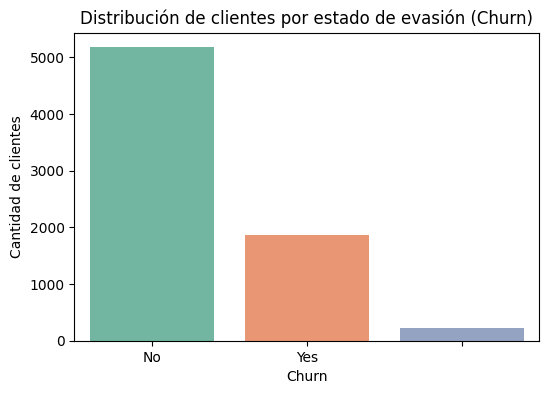

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', hue='Churn', data=df, palette='Set2', legend=False)

plt.title('Distribución de clientes por estado de evasión (Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


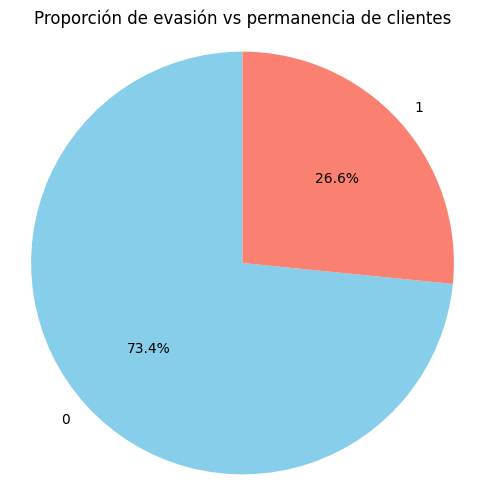

In [71]:
# Contar valores
churn_counts = df_final['Churn'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['skyblue', 'salmon'])

plt.title('Proporción de evasión vs permanencia de clientes')
plt.axis('equal')  # Para que quede redondo
plt.show()


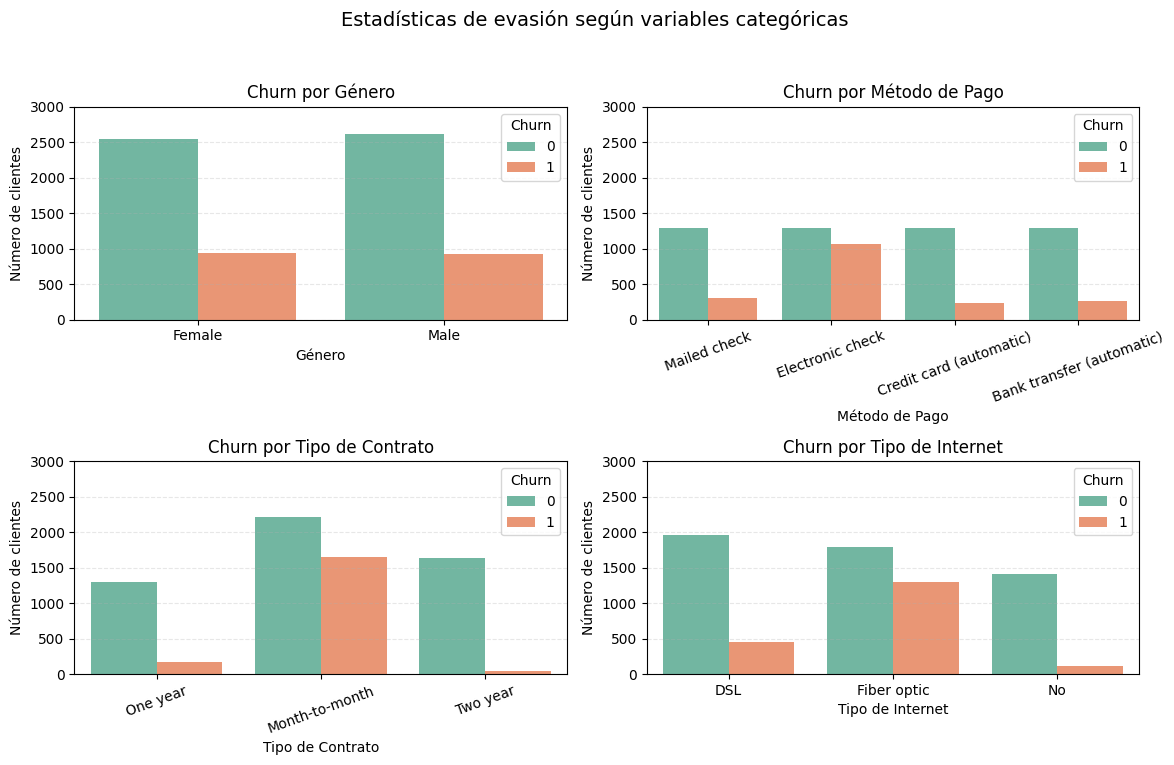

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.suptitle("Estadísticas de evasión según variables categóricas", fontsize=14)

# Gráfico 1: Género
sns.countplot(x='gender', hue='Churn', data=df_final, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title("Churn por Género")
axs[0, 0].set_xlabel("Género")
axs[0, 0].set_ylabel("Cantidad de Clientes")
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.3)

# Gráfico 2: Método de pago
sns.countplot(x='PaymentMethod', hue='Churn', data=df_final, palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title("Churn por Método de Pago")
axs[0, 1].set_xlabel("Método de Pago")
axs[0, 1].set_ylabel("Cantidad de Clientes")
axs[0, 1].tick_params(axis='x', rotation=20)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.3)

# Gráfico 3: Contrato
sns.countplot(x='Contract', hue='Churn', data=df_final, palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title("Churn por Tipo de Contrato")
axs[1, 0].set_xlabel("Tipo de Contrato")
axs[1, 0].set_ylabel("Cantidad de Clientes")
axs[1, 0].tick_params(axis='x', rotation=20)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.3)

# Gráfico 4: Servicio de Internet
sns.countplot(x='InternetService', hue='Churn', data=df_final, palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title("Churn por Tipo de Internet")
axs[1, 1].set_xlabel("Tipo de Internet")
axs[1, 1].set_ylabel("Cantidad de Clientes")
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.3)

# Ajustes generales
ymin = 0
ymax = 3000

for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel("Número de clientes")
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


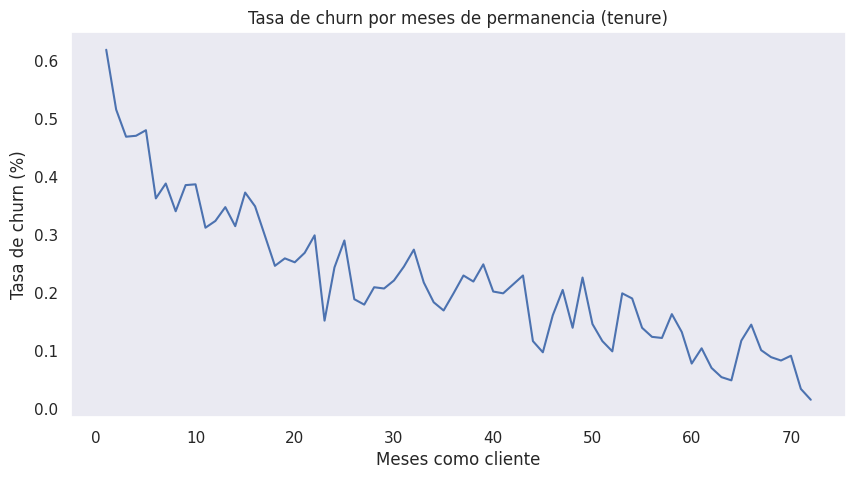

In [81]:
df_churn = df_final.copy()
#df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})

churn_por_tenure = df_churn.groupby('tenure')['Churn'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=churn_por_tenure.index, y=churn_por_tenure.values)
plt.title('Tasa de churn por meses de permanencia (tenure)')
plt.xlabel('Meses como cliente')
plt.ylabel('Tasa de churn (%)')
plt.grid()
plt.show()



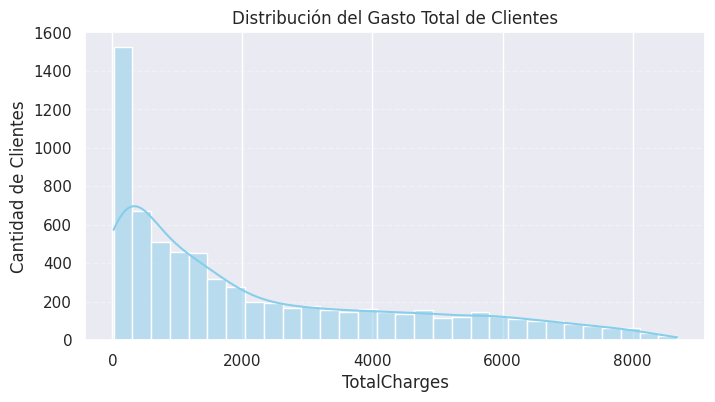

In [83]:
plt.figure(figsize=(8, 4))
sns.histplot(df_final['Charges.Total'], kde=True, bins=30, color='skyblue')
plt.title("Distribución del Gasto Total de Clientes")
plt.xlabel("TotalCharges")
plt.ylabel("Cantidad de Clientes")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


#📄Informe final

##🔹 1. Introducción
El objetivo principal de este análisis es entender los factores que influyen en la evasión de clientes (churn) en una empresa de telecomunicaciones. La evasión ocurre cuando un cliente cancela su contrato, lo que representa una pérdida directa de ingresos.

Mediante el análisis de los datos disponibles, buscamos responder preguntas como:

* ¿Qué perfiles de clientes son más propensos a cancelar?

* ¿Qué servicios o métodos de pago están asociados a mayor churn?

* ¿Qué patrones podemos encontrar para tomar decisiones estratégicas?

##🔹 2. Limpieza y Tratamiento de Datos
A partir del archivo JSON original, se aplicaron los siguientes pasos:

* Importación y normalización del archivo JSON.

* Conversión de columnas numéricas (como TotalCharges) a formato numérico con manejo de errores.

* Eliminación de registros nulos o inválidos (como churn vacío o errores de facturación).

* Corrección de inconsistencias en columnas como 'No internet service' → 'No'.

* Creación de nuevas columnas como:

  *  Cuentas_Diarias: estimación del costo diario por cliente.

* Conversión de variables categóricas a binarias (1/0) para facilitar análisis y modelado.

##3. Análisis Exploratorio de Datos (EDA)
####📊 Distribución de Churn
Se encontró un desbalance: la mayoría de los clientes no cancela, pero una fracción significativa sí lo hace.




```
# sns.countplot(x='Churn', data=df_final)
```

####📊 Churn según variables categóricas
Usando una matriz de 4 gráficos analizamos:

* Género: no hay gran diferencia entre hombres y mujeres.

* Tipo de contrato: los clientes con contrato mensual tienen mucho más churn.

* Método de pago: quienes pagan con cheque electrónico tienen mayor evasión.

* Tipo de internet: quienes usan Fiber optic presentan más churn.

####📊 Análisis de tenure y Churn
* Clientes con menos de 10 meses tienen la mayor tasa de evasión.

* Esto indica un problema en la retención temprana.

####📊 Análisis del Gasto Total (TotalCharges)
Matriz de 4 gráficos muestra:

1. Distribución del gasto total (asimétrica, muchos clientes pagan poco).

2. Boxplot de Churn muestra que quienes se van tienden a tener menos gasto.

3. Scatterplot confirma relación lineal entre tenure y TotalCharges.

4. Tasa de churn por rango de gasto revela que los que menos gastan son los más propensos a cancelar

##🔹 4. Conclusiones e Insights
La evasión está concentrada en clientes con contrato mensual.

* Clientes que usan Fiber Optic o pagan con cheque electrónico son más propensos a irse.

* La mayoría del churn ocurre en los primeros meses (menor a 10).

* Los clientes que gastan poco y llevan poco tiempo son los más volátiles.

* Clientes con mayor tenure y gasto tienden a ser más leales.

##🔹 5. Recomendaciones
Con base en los hallazgos, se sugieren las siguientes acciones:

* ✅ Fidelizar al cliente en los primeros meses: implementar programas de bienvenida, beneficios por permanencia o descuentos a los 3-6 meses.

* ✅ Incentivar contratos a largo plazo: campañas que premien pasar de mensual a anual.

* ✅ Revisar experiencia de clientes con Fiber Optic y cheque electrónico: posibles problemas técnicos o de facturación.

* ✅ Segmentar campañas por gasto total y riesgo de churn: usar modelos predictivos para enfocar esfuerzos en los clientes con mayor riesgo.

* ✅ Diseñar alertas para detectar patrones de salida temprana: por ejemplo, inactividad, bajo uso o quejas.